# Inbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### First, download the data from: https://www.kaggle.com/ntnu-testimon/paysim1. Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?

In [62]:
# Your code here
fraud = pd.read_csv('PS_20174392719_1491204439457_log.csv')
fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
fraud.shape #6 million rows! (6362620, 11)

(6362620, 11)

In [34]:
#sampling a smaller dataframe from the original one to work on
#fraud_detect = fraud.sample(n=20000, random_state=1)
#fraud_detect.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6322570,688,CASH_IN,23557.12,C867750533,8059.00,31616.12,C1026934669,169508.66,145951.53,0,0
3621196,274,PAYMENT,6236.13,C601099070,0.00,0.00,M701283411,0.00,0.00,0,0
1226256,133,PAYMENT,33981.87,C279540931,18745.72,0.00,M577905776,0.00,0.00,0,0
2803274,225,CASH_OUT,263006.42,C11675531,20072.00,0.00,C529577791,390253.56,653259.98,0,0
3201247,249,CASH_OUT,152013.74,C530649214,20765.00,0.00,C1304175579,252719.19,404732.93,0,0


In [10]:
'''
'isFraud' is the target/outcome
'''

"\n'isFraud' is the target/outcome\n"

In [11]:
fraud.shape

(2000, 11)

In [12]:
#fraud_detect.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,2000.000000,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2000.00000,2000.0
mean,244.520500,1.809750e+05,7.992767e+05,8.177470e+05,1.044972e+06,1.184323e+06,0.00250,0.0
std,141.242566,5.314963e+05,2.738312e+06,2.775331e+06,2.448306e+06,2.688441e+06,0.04995,0.0
min,1.000000,2.483000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00000,0.0
25%,157.000000,1.378599e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00000,0.0
50%,236.000000,6.825421e+04,1.473950e+04,0.000000e+00,1.140405e+05,1.906401e+05,0.00000,0.0
75%,332.000000,2.077654e+05,1.076382e+05,1.442079e+05,1.023041e+06,1.174101e+06,0.00000,0.0
max,715.000000,1.000000e+07,3.447909e+07,3.467825e+07,4.582730e+07,4.606345e+07,1.00000,0.0


In [13]:
fraud_detect.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.045751,-0.036690,-0.036765,0.055698,0.053914,0.002297,NaN
amount,0.045751,1.000000,-0.014172,-0.014796,0.184676,0.438965,0.030227,NaN
oldbalanceOrg,-0.036690,-0.014172,1.000000,0.999214,0.056548,0.023463,-0.005440,NaN
newbalanceOrig,-0.036765,-0.014796,0.999214,1.000000,0.057907,0.022726,-0.014755,NaN
oldbalanceDest,0.055698,0.184676,0.056548,0.057907,1.000000,0.953100,-0.014494,NaN
newbalanceDest,0.053914,0.438965,0.023463,0.022726,0.953100,1.000000,-0.007053,NaN
isFraud,0.002297,0.030227,-0.005440,-0.014755,-0.014494,-0.007053,1.000000,NaN
isFlaggedFraud,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
fraud_coor = fraud_detect.corr()
heatmap = fraud_coor.style.background_gradient(cmap='RdYlGn',axis=None).set_precision(2)
heatmap #the worst correlation map ever

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1,0.026,-0.0028,-0.0023,0.032,0.029,0.027,nan
amount,0.026,1,-0.0075,-0.0095,0.34,0.5,0.069,nan
oldbalanceOrg,-0.0028,-0.0075,1,1,0.063,0.038,0.0046,nan
newbalanceOrig,-0.0023,-0.0095,1,1,0.064,0.038,-0.012,nan
oldbalanceDest,0.032,0.34,0.063,0.064,1,0.97,-0.0057,nan
newbalanceDest,0.029,0.5,0.038,0.038,0.97,1,0.00015,nan
isFraud,0.027,0.069,0.0046,-0.012,-0.0057,0.00015,1,nan
isFlaggedFraud,nan,nan,nan,nan,nan,nan,nan,nan


In [15]:
'''
important features for the outcome... well everything has a horrible correlation due to inbalance data
'''

'\nimportant features for the outcome... well everything has a horrible correlation\n'

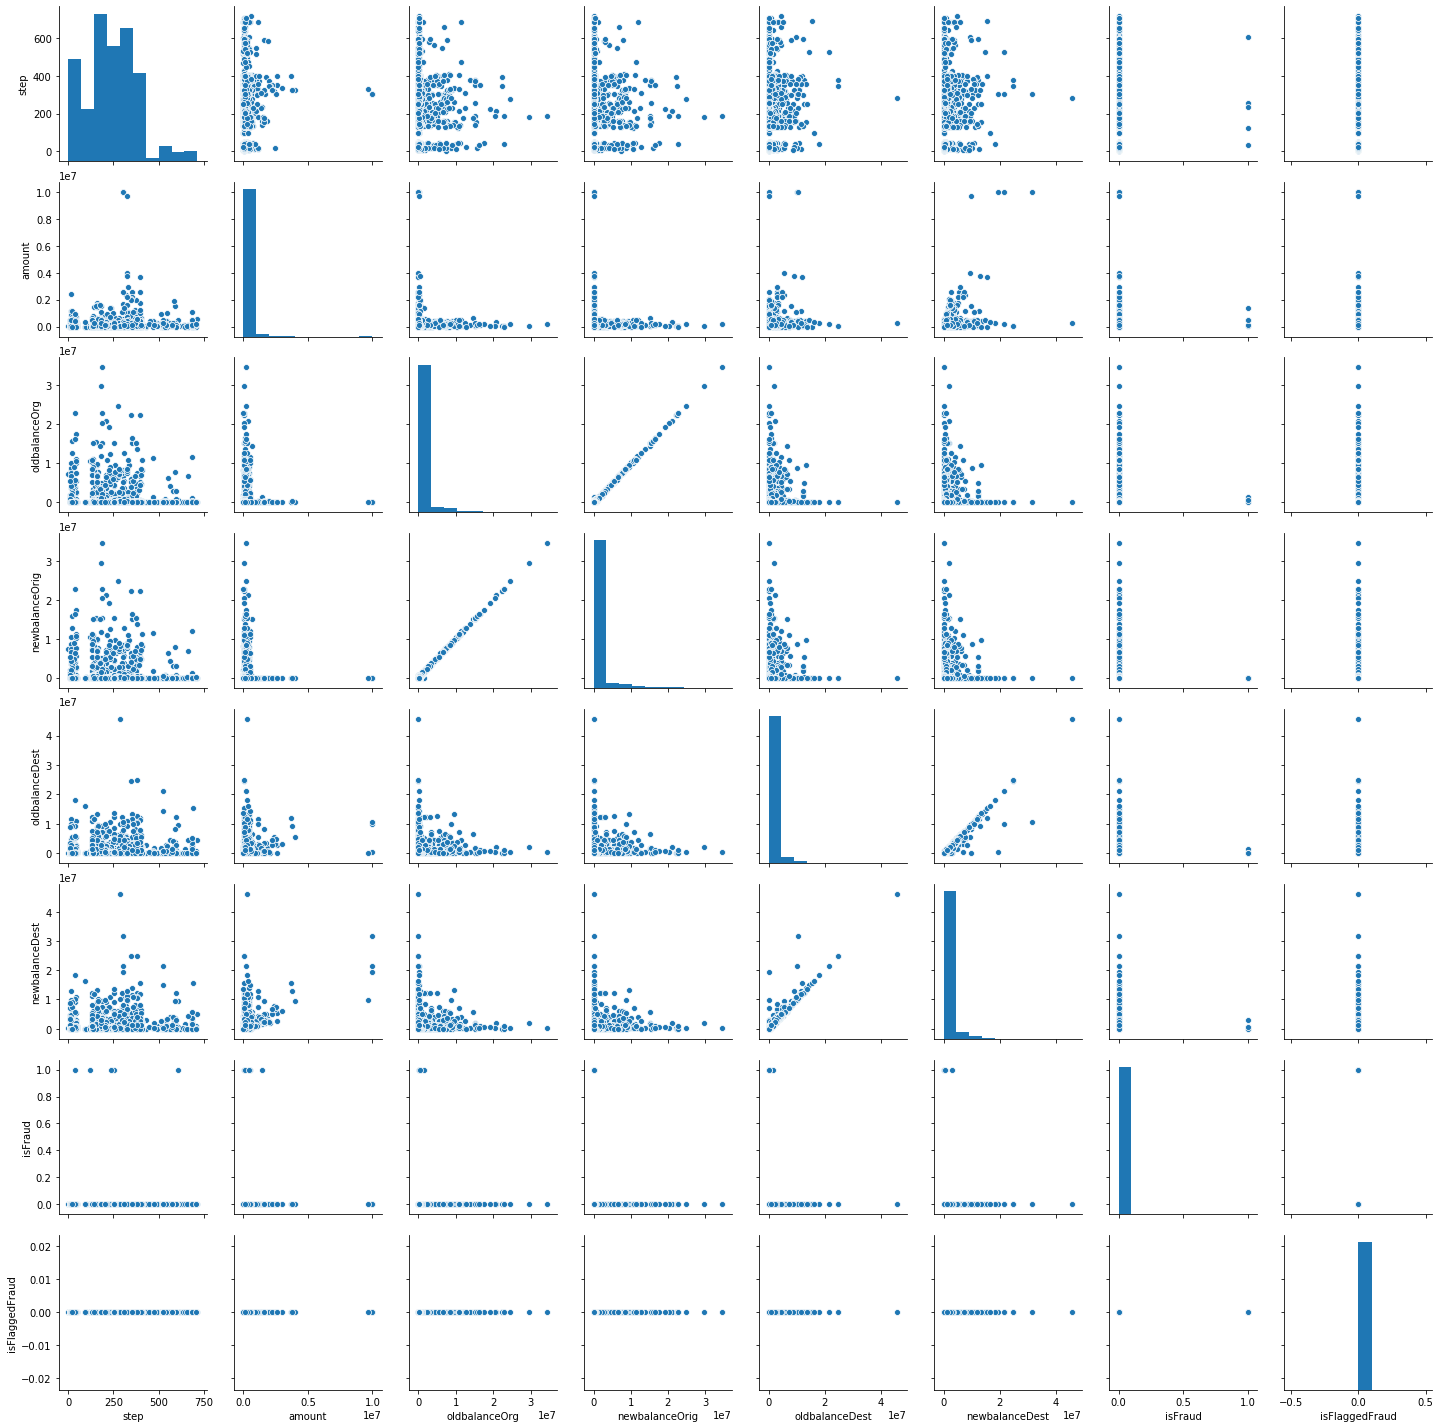

In [16]:
#pairplot
#sns.pairplot(fraud_detect)

### What is the distribution of the outcome? 

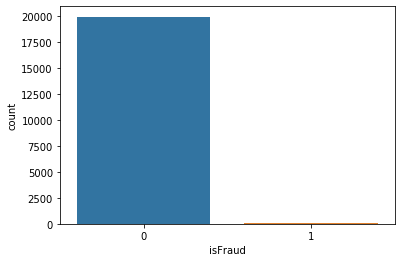

In [36]:
# Your response here
sns.countplot(fraud_detect.isFraud)

#given that we have only two options, it's a bernouli distribution
#I used countplot but histogram would also work
#unbalanced 

In [65]:
fraud.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [68]:
#treat unbalance data. Undersampling:

# Shuffle the Dataset.
shuffled_fraud = fraud.sample(frac=1,random_state=4)

# Put all the fraud class in a separate dataset.
fraud_df = shuffled_fraud.loc[shuffled_fraud['isFraud'] == 1]

#Randomly select 492 observations from the non-fraud (majority class)
non_fraud_df = shuffled_fraud.loc[shuffled_fraud['isFraud'] == 0].sample(n=8213,random_state=42)

# Concatenate both dataframes again
normalized_fraud = pd.concat([fraud_df, non_fraud_df])

#plot
#sns.countplot(normalized_fraud.isFraud)

In [71]:
normalized_fraud.shape

(16426, 11)

In [72]:
normalized_fraud.isFraud.value_counts()

1    8213
0    8213
Name: isFraud, dtype: int64

In [ ]:
#normalized_fraud_coor = normalized_fraud.corr()
#heatmap = normalized_fraud_coor.style.background_gradient(cmap='RdYlGn',axis=None).set_precision(2)
#heatmap #it didn't got better...

### Clean the dataset. How are you going to integrate the time variable? Do you think the step (integer) coding in which it is given is appropriate?

In [19]:
'''
step: maps a unit of time in the real world. In this case 1 step is 1 hour of time. 
Total steps 744 (30 days simulation).
'''
#Doesn't seem to contribute to the outcome. I will drop it.

'\nstep: maps a unit of time in the real world. In this case 1 step is 1 hour of time. \nTotal steps 744 (30 days simulation).\n'

In [73]:
# Your code here
normalized_fraud.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [74]:
normalized_fraud.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [75]:
#to train the model we don't need to know nameOrig, nameDest, so we can drop it
fraud_det = normalized_fraud.drop(columns=['step','nameOrig','nameDest'])
fraud_det.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1291987,TRANSFER,7927.06,7927.06,0.0,0.00,0.00,1,0
6276620,TRANSFER,246250.77,246250.77,0.0,0.00,0.00,1,0
347735,CASH_OUT,121626.82,121626.82,0.0,653744.34,775371.16,1,0
3658949,CASH_OUT,2607790.58,2607790.58,0.0,7640097.83,10247888.41,1,0
4486593,TRANSFER,10211.81,10211.81,0.0,0.00,0.00,1,0


In [76]:
fraud_det.shape

(16426, 8)

In [81]:
fraud_det.dtypes

type               object
amount            float64
oldbalanceOrg     float64
newbalanceOrig    float64
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [77]:
#'type' I can latter use get_dummies to convert from categorical to ordinal
fraud_det.type.value_counts()

CASH_OUT    6935
TRANSFER    4799
PAYMENT     2796
CASH_IN     1845
DEBIT         51
Name: type, dtype: int64

In [97]:
fraud_dummy = pd.get_dummies(fraud_det, drop_first=True)
fraud_dummy.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
1291987,7927.06,7927.06,0.0,0.00,0.00,1,0,0,0,0,1
6276620,246250.77,246250.77,0.0,0.00,0.00,1,0,0,0,0,1
347735,121626.82,121626.82,0.0,653744.34,775371.16,1,0,1,0,0,0
3658949,2607790.58,2607790.58,0.0,7640097.83,10247888.41,1,0,1,0,0,0
4486593,10211.81,10211.81,0.0,0.00,0.00,1,0,0,0,0,1


### Run a logisitc regression classifier and evaluate its accuracy.

In [98]:
#scalling?
from sklearn.preprocessing import MinMaxScaler, StandardScaler 

In [99]:
from sklearn.model_selection import train_test_split

y = fraud_dummy['isFraud']
X = fraud_dummy.drop(['isFraud'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=29)

In [101]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
acc = lr.score(X_test,y_test)*100

print(f"Test Accuracy {round(acc, 2)}%") 

Test Accuracy 82.99%


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [86]:
#another way of dealing with inbalanced data
'''
https://towardsdatascience.com/having-an-imbalanced-dataset-here-is-how-you-can-solve-it-1640568947eb
'''

#get the original data (not undersampled)
fraud.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [87]:
fraud2 = fraud.drop(columns=['step','nameOrig','nameDest'])
fraud2.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [88]:
fraud2_dummy = pd.get_dummies(fraud2, drop_first=True)
fraud2_dummy.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,0,1,0
1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,0,1,0
2,181.00,181.0,0.00,0.0,0.0,1,0,0,0,0,1
3,181.00,181.0,0.00,21182.0,0.0,1,0,1,0,0,0
4,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,0,1,0


In [92]:
fraud2_dummy.shape

(6362620, 11)

In [94]:
#another model

from imblearn.ensemble import BalancedBaggingClassifier

bbc = BalancedBaggingClassifier(base_estimator=LogisticRegression(),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=0)

y = fraud2_dummy['isFraud']
X = fraud2_dummy.drop(['isFraud'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

#Train the classifier.
bbc.fit(X_train, y_train)
y_pred = bbc.predict(X_train)
acc = bbc.score(y_test,y_pred)*100

print(f"Test Accuracy {round(acc, 2)}%") #didn't work...

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework

ValueError: Expected 2D array, got 1D array instead:
array=[0 0 0 ... 0 0 0].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

### Now pick a model of your choice and evaluate its accuracy.

In [112]:
# Your code here
from sklearn.neighbors import KNeighborsClassifier

y = fraud_dummy['isFraud']
X = fraud_dummy.drop(['isFraud'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=29)


knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

acc = knn.score(X_test, y_test)*100
print(f"2 neighbors KNN Score: {round(acc,2)}%")

2 neighbors KNN Score: 95.5%


### Which model worked better and how do you know?

In [ ]:
# Your response here

In [104]:
#cross validation to logistic regression
from sklearn.model_selection import cross_val_score
cv_results = cross_val_score(lr, X, y, cv=5) 
cv_results

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework

array([0.82744979, 0.82927572, 0.90900791, 0.81973203, 0.82612667])

In [106]:
#cross validation to KNN
from sklearn.model_selection import cross_val_score
cv_results = cross_val_score(knn, X, y, cv=5) 
cv_results

array([0.95252587, 0.95404747, 0.95709069, 0.96010962, 0.95797808])

In [ ]:
'''
Given that KNN gives me the best score in accuracy and it is consistent accross 5 different validations,
I would say that KNN did better here
'''

In [108]:
#grid search for KNN

from sklearn.model_selection import GridSearchCV
from sklearn import neighbors

param_grid = {'n_neighbors': np.arange(1,15)} 
knn = neighbors.KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X,y)
knn_cv.best_params_

{'n_neighbors': 1}

In [109]:
knn_cv.best_score_

0.9601850724461221

In [113]:
'''
So actually the above tells me I should run the KNN with n_neighbors = 1 to have better results
'''
y = fraud_dummy['isFraud']
X = fraud_dummy.drop(['isFraud'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=29)


knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

acc = knn.score(X_test, y_test)*100
print(f"2 neighbors KNN Score: {round(acc,2)}%")

2 neighbors KNN Score: 96.1%


In [115]:
from sklearn.metrics import confusion_matrix

y_pred = knn.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[1523,   79],
       [  49, 1635]])